# Alex Gilbert Machine Learning Programming Exercise 1

Code written by Alex G


## 2 Classification Task

Choose a classiﬁcation dataset and apply logistic regression on a random subset of the training set of increasing size. You should randomly select training sets that include more and more data points: 

a) Plot the approximation error (or mean accuracy) on the training set as a function of the number of samples (i.e. data points in the training set)

b) Plot the cpu-time as a function of the number of samples

c) Explain the behaviour of both curves

d) Plot the learned weights for two diﬀerent number of training samples. Can you ﬁnd an interpretation for the learned weights?

In [22]:
#import required libraries
print("Importing required libraries...")
import pandas as pd 
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import time 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

print("Import successful.")

Importing required libraries...
Import successful.


## Functions 

In [23]:
def ImportData(fileName = None):
    
    # this function handles the import of the data
    
    # inputs:
    # fileName - string (or None), this is the file
    #            name we want to import, in practice as only one file 
    #             was needed so this is redundant     
    
    # outputs:
    # dataDF - dataframe, contains the data from the file
    
    # NOTES
    # Here pandas is used for the import since the data 
    # was downloaded as a .gz file and the machine this code
    # was built on does not have native support to open 
    # .gz files, thus pandas was used directly
    
    
    #import the data
    if fileName is None:
        fileName = 'path\\to\\data\\SUSY.csv.gz'
    
    
    # create column names, the first one contains 
    # the labels, all later ones contain features
    # it will be useful in the future to have col
    # names all containing the string 'dim' as it can be used
    # to remove feautre data and not labels data
    colNamesLabel = ['labels']
    colNames = ['dim_%s' %str(i + 1) for i in range(18)]
    colNames = colNamesLabel + colNames
    
    # generally a good idea to specify the data 
    #types of the data which is being imported
    # the below lines of code handle the creation 
    # of a dictionary to hold the data types
    # note labels is an integer (0 or 1) and 
    # all other data items are floats
    dataTypeDict = {}
    for item in colNames:
        if item == 'labels':
            dataTypeDict[item] = np.int16
        else:
            dataTypeDict[item] = np.float32
    
    # read the data and store in a data frame
    dataDF = pd.read_csv(fileName, compression='gzip', 
                         error_bad_lines=False, 
                         header = None, 
                         names = colNames,
                         dtype = dataTypeDict, 
                         index_col=False)


    
    return dataDF



In [24]:
def RunLogisticRegression(inputData, startEndStepSample = None):
    
    #this function builds logistic regression models 
    # with increasing numbers of data points and outputs the time 
    # taken to build and accuracy of the models created
    
    #Inputs:
    # inputsData - dataframe, containing all the data 
    #                        (including labels) to build the 
    # startEndStepSample - tuple of 3 ints, tells the code 
    #                      how many to models to build and the 
    #                       number of data points to 
    #                      include in the models
    
    # outputs:
    # inputSize - list of ints, with the number 
    #             of data items used to train the 
    #             respective model
    # resultsMeanAccuracy - list of floats, with 
    #                     the mean accuracy of each respective model
    # timeToRun - list of floats, the time taken to 
    #             build each respective model
    

    # create the start point, endpoint, and 
    # stepsize for the number of samples 
    # to use to build models (if they have 
    # not been specified by the function)
    if startEndStepSample is None:
        startEndStepSample = (inputData.shape[1]-1,
                              inputData.shape[0],100) 
    
    # Notes
    # The LogisticRegression function used below 
    # required at least one example of each class
    # in order to achieve this the sampling method 
    # randomly selects data until there are 
    # at least two classes, this is computationally
    # inefficient however given the small amount of data the 
    # amount of time taken to repeatedly sample is negligible 
    
    #outputs needed to plot the data later
    resultsMeanAccuracy = []
    timeToRun = []
    inputSize = []
    
    #find the columns containing input data
    colsToSelect = [ item for item in inputData.columns if 'dim' in item]
    
    #loop to build models
    for nSamples in range(startEndStepSample[0],
                          startEndStepSample[1],
                          startEndStepSample[2]):
        
        # add size to output variable (required for plotting later)
        inputSize.append(nSamples)
        
        #####################################################################
        ####### ensure we have examples of both classes to train model ######
        ######################################################################
        # used to stop infinite loops
        whileCount = 1
        # flag to know we have data which can be used to train the model
        sufficientDataToTrain = False
        
        while (not sufficientDataToTrain) and (whileCount < 30):
        
            whileCount += 1
            
            #get random data sample
            trainingDataDF = inputData.sample(n = nSamples)
            
            # get feature data of sample
            inputTrainingData = trainingDataDF[colsToSelect]
            
            # check there is at least one '0' label and one '1' label
            sufficientDataToTrain = (1 in trainingDataDF['labels'].unique()) and \
            (0 in trainingDataDF['labels'].unique())
        
        ######################################################################
        
        # inform user if there was too many loops of the while statement
        if whileCount>= 30:
            raise StopIteration("RunLogisticRegression")
        
        # begin clock
        startTime = time.time()
        
        #build model
        clf = LogisticRegression(random_state=0, solver='lbfgs', C = 10^5)
        
        clf.fit(inputTrainingData, trainingDataDF['labels'])
        
        # record time taken
        timeToRun.append(time.time() - startTime)
        
        # Record the accuracy
        resultsMeanAccuracy.append(clf.score(inputTrainingData,
                                             trainingDataDF['labels']))
        
    return inputSize, resultsMeanAccuracy, timeToRun
        

In [25]:
def PlotData(nSamples, Score, graphTitle = None, yLabel = None):
    
    # this function is a wrapper for plotting
    
    #Inputs:
    # nSamples - list of ints, this contains 
    #            the number of data items used 
    #            to build the model
    # Score - list of floats, this is the metric 
    #         we are measureing w.r.t. the number 
    #         of data items used to build the model
    # graphTitle - string, graph title
    # yLabel - string, label for y axis
    
    # used to control the size of the graph
    plt.figure(figsize=(20, 5))
    
    # create graph
    plt.scatter(nSamples,Score,color='red', marker = "o")
    
    #get axis object
    ax = plt.gca()
    
    ## add legend to top right hand corner and label 
    plt.xlabel("Size of training set")
    plt.ylabel(yLabel)

    # add title if one is given to the function
    if graphTitle is not None:
        ax.set_title(graphTitle)

    # show graph
    plt.show()
    

## Exploratory Data Analysis

The data I used in this assignment is from a data set called 'SUSY', more information can be found here:  https://archive.ics.uci.edu/ml/datasets/SUSY 

As described in the above link "This is a classification problem to distinguish between a signal process which produces supersymmetric particles and a background process which does not."

There are 18 features used here (8 low-level features then 10 high-level features):: lepton 1 pT, lepton 1 eta, lepton 1 phi, lepton 2 pT, lepton 2 eta, lepton 2 phi, missing energy magnitude, missing energy phi, MET_rel, axial MET, M_R, M_TR_2, R, MT2, S_R, M_Delta_R, dPhi_r_b, cos(theta_r1). The subject matter is that of particle physics which is outside of my area of expertise. Essentially I believe these variables are measures of particles produced after high energy collisions. More information can be found in the paper "Searching for Exotic Particles in High-Energy Physics with Deep Learning" by P. Baldi, P. Sadowski, and D. Whiteson which can be found here: https://arxiv.org/abs/1402.4735.

A potential issue here is that the last 10 features have ben engineered from the original 8 features, this will lead to correlations between the features. This potential issue has not been tackled in the this work.

The labels are either a 1 or a 0, one being the signal of interest, 0 being a background signal (of no interest to this experiment).

There are 5 million examples in the data set.

Below we can see a pairwise scatter matrix of plots of the features with the diagonal showing the histograms of the data features. This shows us how the data is distributed and if there are any string correlations. It play no part in the actual analysis but can be a useful tool to help gain a general understanding of the data. As can be seen below there appears to be many features with are correlated, mostly in the last 10 features. Given that these features have been created as function of the original 8 features this is not unexpected.

### Import data and view variables

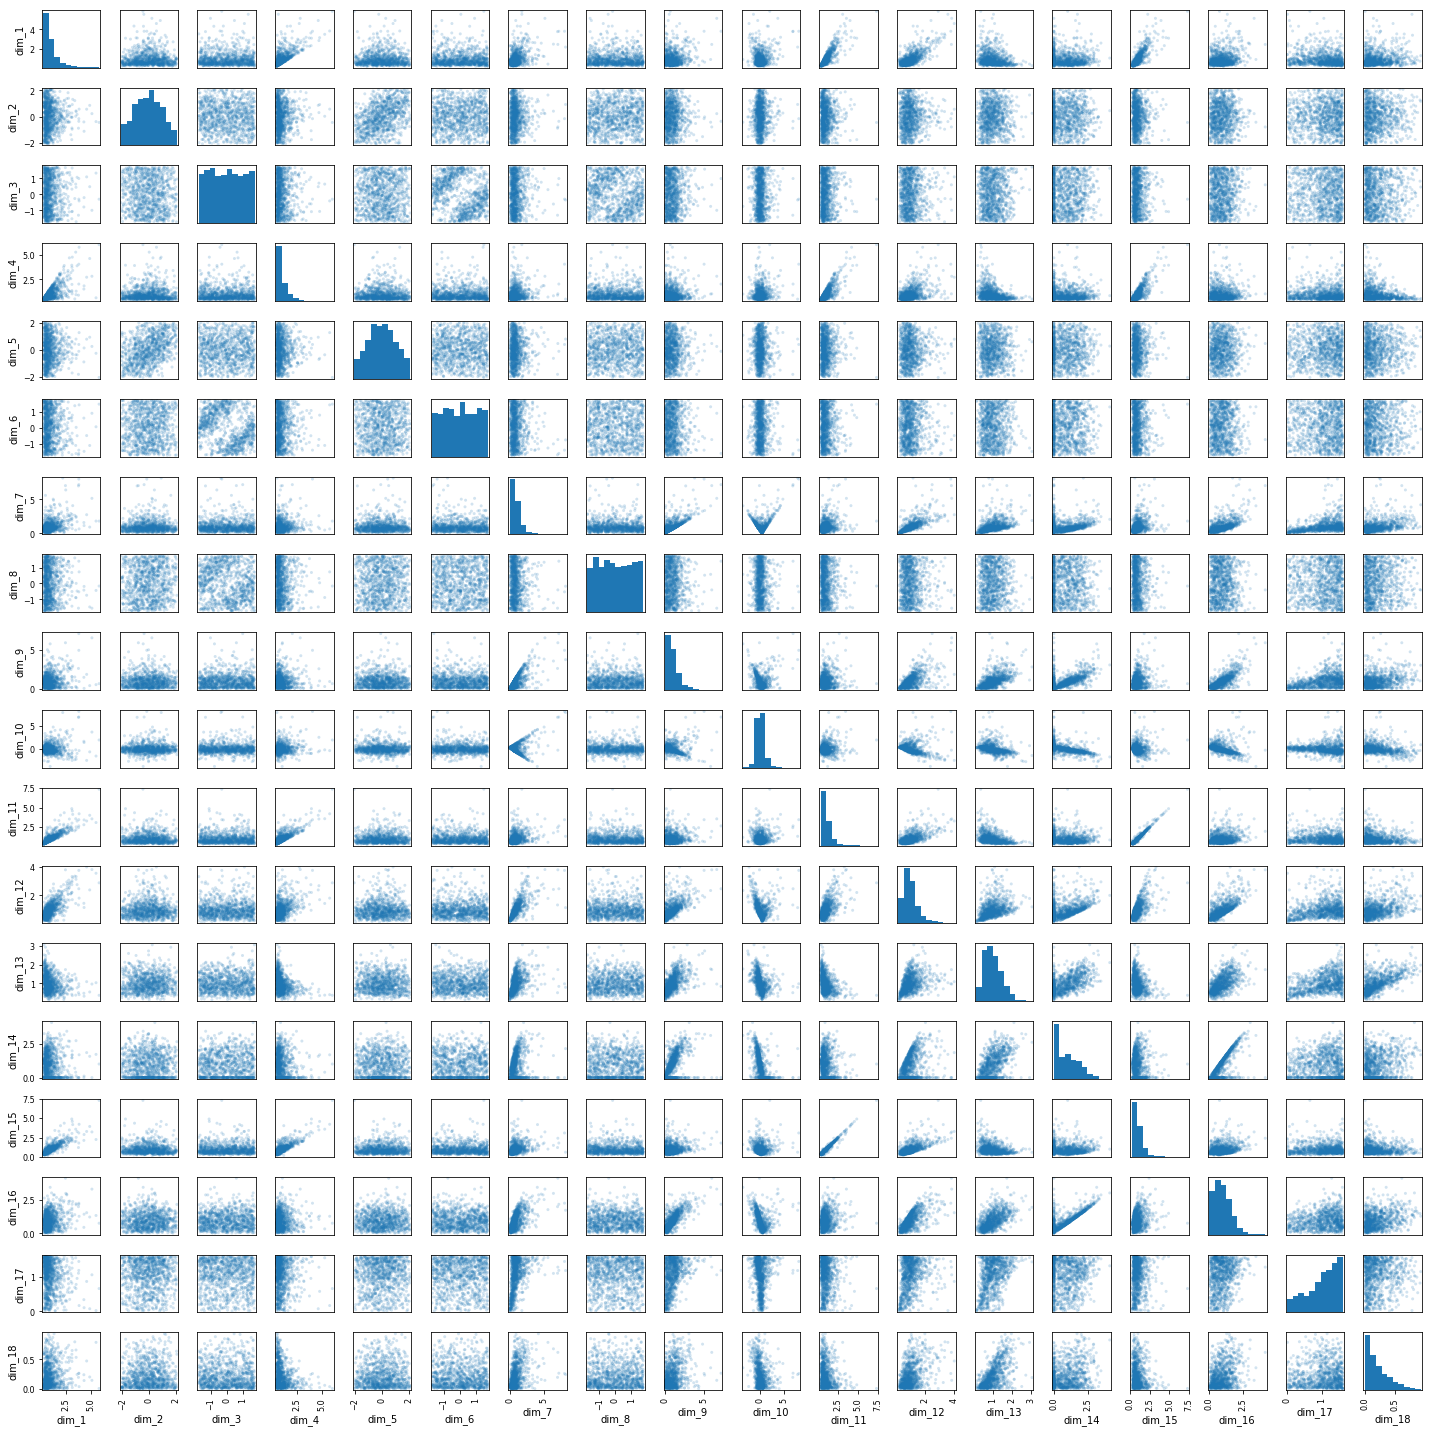

In [21]:
#Import Data
dataDF = ImportData()

#find the columns containing input data
colsToSelect = [ item for item in dataDF.columns if 'dim' in item]

# get random sample of data (a cross plot on 5 million points 
# would require plotting around (5 million)^2 data points)
# since this step is only used to get a handle on the data 
# only a small sub set is needed
subsetForExplorationDF =  dataDF.sample(n = 1000)

# plot the scatter matrix
axes = pd.plotting.scatter_matrix(subsetForExplorationDF[colsToSelect],
                                  alpha=0.2, figsize=(20, 20))
plt.tight_layout()


## Run the Model

I chose here to approach the problem in two ways, first with a large increase in the number of data points between successive models (large step size), and then with a small increase in the number of data points between successive models. The reason for building two models is that I found large increases in data items very quickly stablises which means it is more difficult to see the improvements between models, however it does show the behaviour on more extreme larger models. Using a small increase in data points it is possible to see the stabilising behaviour in more detail however it does not give an understanding on the behaviour of larger models. I found trying to start at a small number of data items and increase that amount in small steps to a large number of data items to be infeasible on the computing power available, hence the use of two approaches.

For the large step size I chose to build models from 20 data item in steps of 1,000 up to 100,000 (effectively the last model will have 99,020). 20 was chosen as the starting value as it is close to (although slightly above) the number of features in the data. 100,000 was chosen as a stopping point rather arbitrarily, although I found the results showed a good pattern by 100,000 and increasing the final number of points required building more models which took increasingly more time.

For the small step size I chose to start at 20 data items (for the same reason above) and increase in steps of 5 data items up to 1000. This was chosen as from testing it gave a good understanding of the stabilising behaviour of the data.

Here the pandas data frame 'sample' method was used to create the random data sets thus ensuring at every step there is a random data subset with all points in the data set equally likely to be selected.

In [26]:
#run logistic regression on large step size
nSamplesListLargeStep, accuracyListLargeStep, timeToRunListLargeStep = \
RunLogisticRegression(dataDF, startEndStepSample = (20,100000,1000))

#run logistic regression on small step size
nSamplesListSmallStep, accuracyListSmallStep, timeToRunListSmallStep = \
RunLogisticRegression(dataDF, startEndStepSample = (20,1000,5))


a) Plot the approximation error (or mean accuracy) on the training set as a function of the number of samples (i.e. data points in the training set)

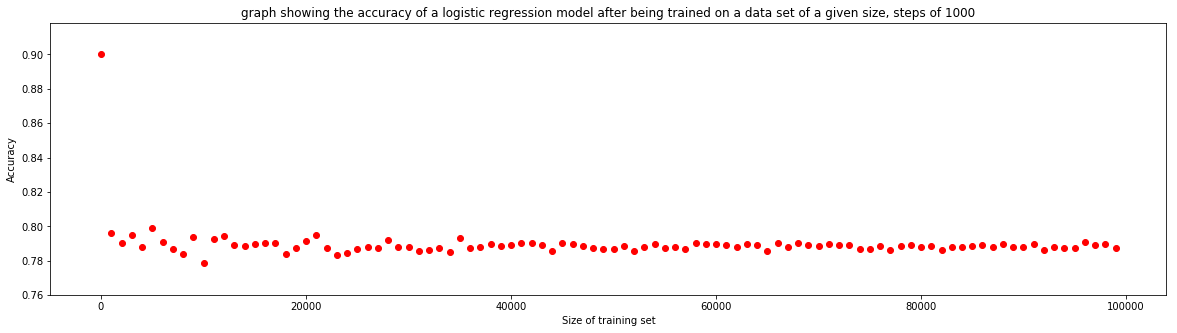

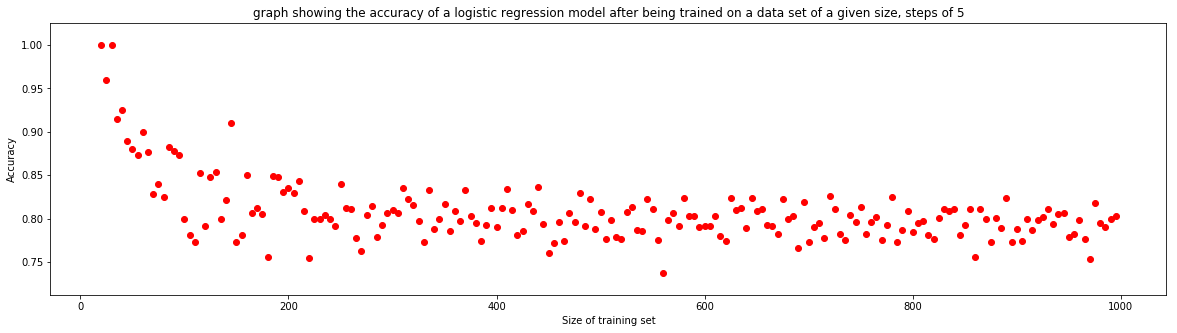

In [27]:
graphTitle = "graph showing the accuracy of a logistic "\
"regression model after being trained on a data set "\
"of a given size, steps of 1000"

PlotData(nSamplesListLargeStep, 
         accuracyListLargeStep, 
         graphTitle = graphTitle, 
         yLabel = "Accuracy")

graphTitle = "graph showing the accuracy of a logistic "\
"regression model after being trained on a data set "\
"of a given size, steps of 5"

PlotData(nSamplesListSmallStep,
         accuracyListSmallStep,
         graphTitle = graphTitle,
         yLabel = "Accuracy")

b) Plot the cpu-time as a function of the number of samples

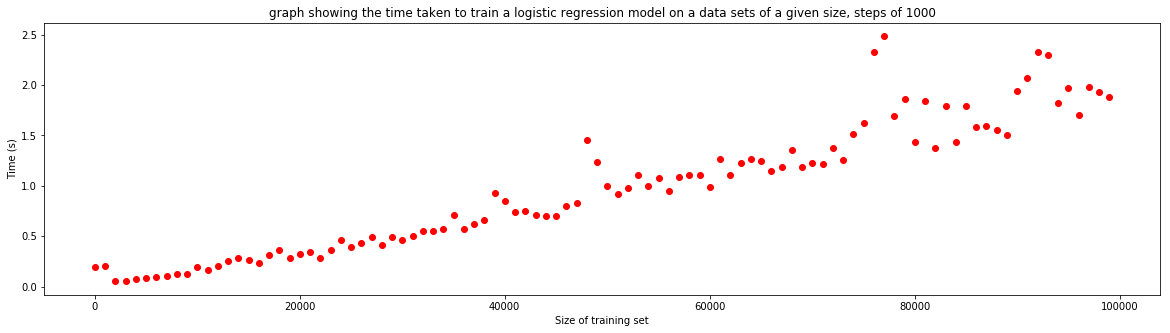

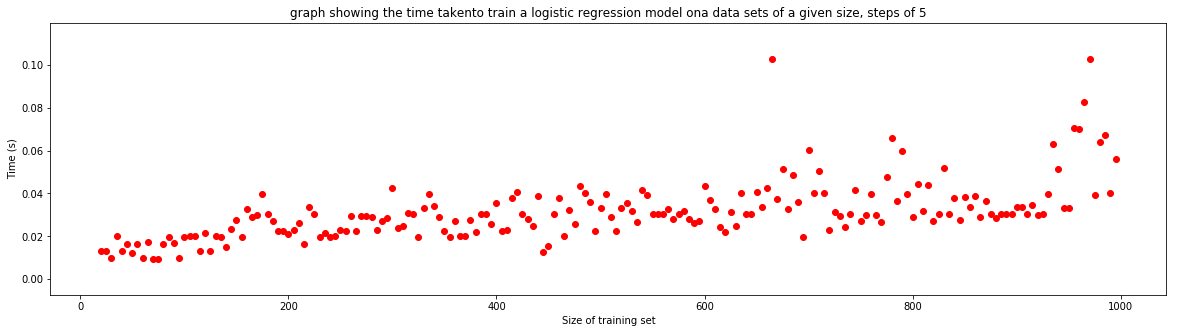

In [28]:
graphTitle = "graph showing the time taken"\
" to train a logistic regression model "\
"on a data sets of a given size, steps of 1000"

PlotData(nSamplesListLargeStep,
         timeToRunListLargeStep,
         graphTitle = graphTitle, 
         yLabel = "Time (s)")

graphTitle = "graph showing the time taken"\
"to train a logistic regression model on"\
"a data sets of a given size, steps of 5"

PlotData(nSamplesListSmallStep,
         timeToRunListSmallStep, 
         graphTitle = graphTitle,
         yLabel = "Time (s)")

c) Explain the behaviour of both curves

The graph from section (a) with a small step shows the accuracy tending towards a value of around 0.8, the large step size graph shows that with large models this average accuracy drops to slightly below 0.8 (to around 0.79). Both graphs the trend of stabilisation with increasing data items. Thus it looks likely that regardless of the number of data items included in a logistic regression model the in sample error will stay around 0.79.

The graphs from section (b) above show that the time to train a logistic regression model is approximately proportional to the number of data items in the training set. There is more variability around this trend on the smaller step size although this is to be expected as successive models have more similar number of data items in their training set than with the large step models. This shows that although other models may be more accurate, if you have a large amount of data a logistic regression model might provide a good balance of accuracy and training time.

d) Plot the learned weights for two diﬀerent number of training samples. Can you ﬁnd an interpretation for the learned weights?

Here two models, one trained on 100 data points, and one trained on 100,000 data points have been built. These numbers were chosen somewhat arbitrarily but the general aim was to have one relatively small sample, and one large.

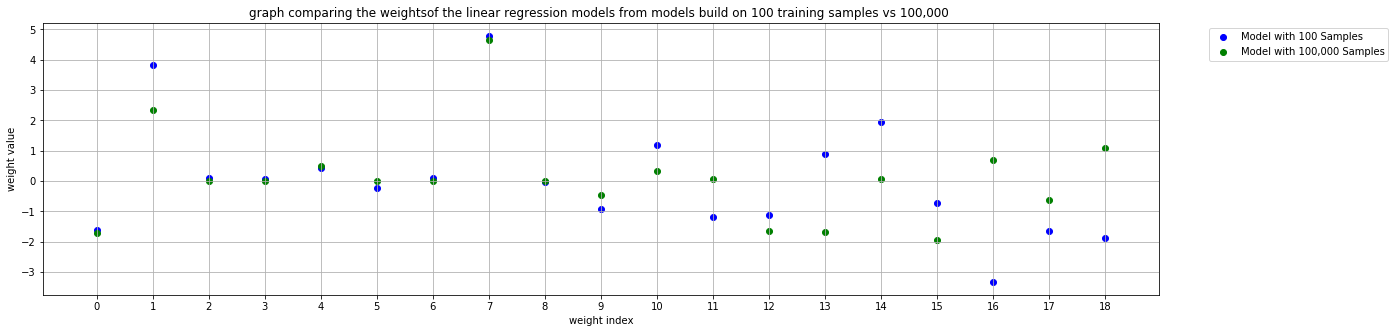

In [29]:
################################################################################
#### build one classifier with a relatively low number of training examples ###
################################################################################

trainingDataSmallDF = dataDF.sample(n = 100)

#find the columns containing input data
colsToSelect = [ item for item in dataDF.columns if 'dim' in item]

inputTrainingDataSmall = trainingDataSmallDF[colsToSelect]

clfFewSamples = LogisticRegression(random_state=0, solver='lbfgs', C = 10^5)

clfFewSamples.fit(inputTrainingDataSmall, trainingDataSmallDF['labels'])
##################################################################################

###################################################################################
#### build one classificer with a relatively large number of training examples ####
###################################################################################

trainingDataLargeDF = dataDF.sample(n = 100000)

#find the columns containing input data
colsToSelect = [ item for item in dataDF.columns if 'dim' in item]

inputTrainingDataLarge = trainingDataLargeDF[colsToSelect]

clfManySamples = LogisticRegression(random_state=0, solver='lbfgs',C = 10^5)

clfManySamples.fit(inputTrainingDataLarge, trainingDataLargeDF['labels'])
##################################################################################


##################################################################################
############                        plot data                           ##########
##################################################################################

#create weights list for model with few samples
weightsFew = np.concatenate((clfFewSamples.intercept_, clfFewSamples.coef_)
                            ,axis=None)

#create weights list for model with few samples
weightsMany = np.concatenate((clfManySamples.intercept_, clfManySamples.coef_)
                             ,axis=None)

#create variable for the x axis of the plot (weight indexes)
weightNumbersList = [i for i in range(weightsFew.shape[0])]

#change figure size
plt.figure(figsize=(20, 5))

# add data to scatter plot
plt.scatter(weightNumbersList, 
            weightsFew, 
            color='blue',
            marker = "o",
            label = 'Model with 100 Samples')

plt.scatter(weightNumbersList,
            weightsMany, 
            color='green',
            marker = "o",
            label = 'Model with 100,000 Samples')

#add labels to graph
ax = plt.gca()
weightsGraphTitle = "graph comparing the weights"\
"of the linear regression models from models "\
"build on 100 training samples vs 100,000 "

ax.set_title(weightsGraphTitle)
plt.legend(loc = "upper left",
           bbox_to_anchor=(1.04, 1),
           numpoints=4,
           fontsize=10)

plt.xlabel("weight index")
plt.ylabel("weight value")

# change x tick and add grid to make the graph easier to interpret
plt.xticks(weightNumbersList,weightNumbersList)
plt.grid()

plt.show()

##################################################################################


The weights of logistic regression model are in some sense the amount each feature adds (or subtracts) from the likelihood of the positive class being predicted. This can be seen because before applying the logistic function the model is linear thus a positive weight applied to a given feature (keeping all other the same) would make the final summed linear combination of weights multiplied with features larger, and the larger the summed linear combination of weights and features, the more likely the model is to predict the positive class (indeed when the summed linear combination of the product of weights and features increases above 0.5 the positive class will be predicted by the model). 

Similarly if a weight is negative it would mean that as the value of the associated feature increases the likelihood of predicting the positive class decreases. Thus a large positive weight implies that the associated feature is a predictor of the negative class.

As can be seen in the above graph in this section the weights of the features from the two model are relatively similar and are all well within the same order of magnitude. Some are very close (weights 0, 2, 3, 4, 5, 6, 7) interestingly (upon visual inspection) weights 13, 16, 18 the two models produce weight with different signs. Given the above discussion this would imply that in the two models these features have opposite predictive ability (e.g. for weight 12 in the model built with few examples an increase in this feature would generally signify a positive class prediction, and in the model built with many samples an increase in this feature would generally signify a negative class prediction).